In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, rand_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline
pd.set_option('display.max_columns', None)
df = pd.read_csv('df_arabica_clean.csv')
#sweetness, defects, clean cup and uniformity all 10 for every row
# df = df.drop(columns=['ICO Number', 'Unnamed: 0', 'ID', 'Sweetness', 'Clean Cup', 'Defects', 'Uniformity'])
df = df.fillna('N/A')
df.head()

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,In-Country Partner,Harvest Year,Grading Date,Owner,Variety,Status,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,N/A,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,1,35 kg,Japan Coffee Exchange,2021 / 2022,"September 21st, 2022",Coffee Quality Union,Castillo,Completed,Double Anaerobic Washed,8.58,8.50,8.42,8.58,8.25,8.42,10.0,10.0,10.0,8.58,0.0,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,N/A,Taiwan Coffee Laboratory,1200,Chiayi,曾福森,1,80 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Gesha,Completed,Washed / Wet,8.50,8.50,7.92,8.00,7.92,8.25,10.0,10.0,10.0,8.50,0.0,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,N/A,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,19,25 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Java,Completed,Semi Washed,8.33,8.42,8.08,8.17,7.92,8.17,10.0,10.0,10.0,8.33,0.0,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,N/A,Coffee Quality Union,1900,"Los Santos,Tarrazu",Santa Maria de Dota,1,22 kg,Japan Coffee Exchange,2022,"September 21st, 2022",Coffee Quality Union,Gesha,Completed,Washed / Wet,8.08,8.17,8.17,8.25,8.17,8.08,10.0,10.0,10.0,8.25,0.0,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,N/A,Coffee Quality Union,1850-2100,"Popayan,Cauca",Camilo Merizalde,2,24 kg,Japan Coffee Exchange,2022,"March 6th, 2023",Coffee Quality Union,Red Bourbon,Completed,"Honey,Mossto",8.33,8.33,8.08,8.25,7.92,7.92,10.0,10.0,10.0,8.25,0.0,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


In [54]:
numCountries = len(df['Country of Origin'].value_counts())

flavMetrics = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance']
keepCols = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Country of Origin']
scoreCols = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance']

df = df[keepCols]

# drop outlier with moisture percentage of 0
# df = df.loc[df['Moisture Percentage'] > 0]

# converts scores out of 10 to 0-1 scale
for i in scoreCols:
    df[i] = df[i].apply(lambda x: x / 10.0)

# converts moisture percentage to 0-1 scale
# df['Moisture Percentage'] = df['Moisture Percentage'].apply(lambda x: x / 100.0)

X = df.drop(columns='Country of Origin')
y = df['Country of Origin']
df.head()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Country of Origin
0,0.858,0.850,0.842,0.858,0.825,0.842,Colombia
1,0.850,0.850,0.792,0.800,0.792,0.825,Taiwan
2,0.833,0.842,0.808,0.817,0.792,0.817,Laos
3,0.808,0.817,0.817,0.825,0.817,0.808,Costa Rica
4,0.833,0.833,0.808,0.825,0.792,0.792,Colombia


<Axes: xlabel='Aroma', ylabel='Count'>

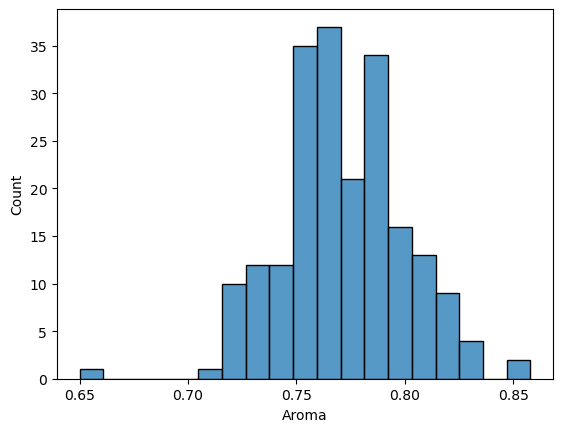

In [55]:
sns.histplot(data=df[scoreCols[0]])

<Axes: xlabel='Flavor', ylabel='Count'>

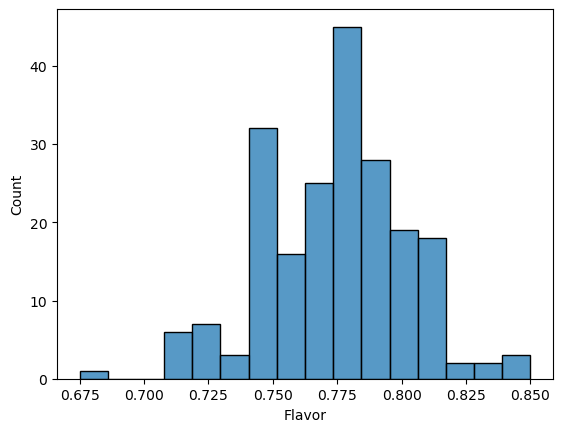

In [56]:
sns.histplot(data=df[scoreCols[1]])

<Axes: xlabel='Aftertaste', ylabel='Count'>

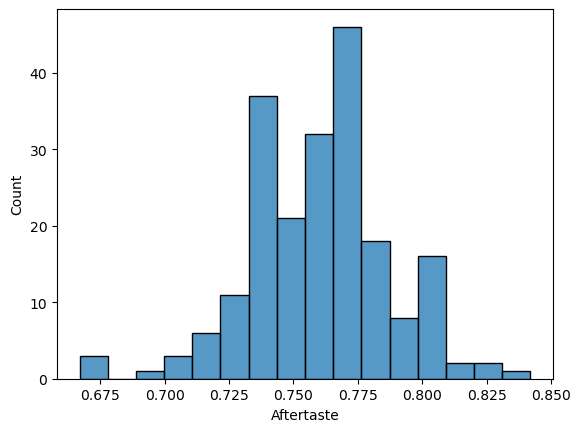

In [57]:
sns.histplot(data=df[scoreCols[2]])

<Axes: xlabel='Acidity', ylabel='Count'>

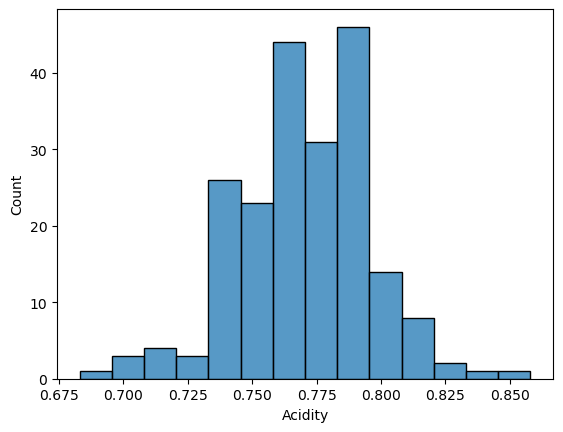

In [58]:
sns.histplot(data=df[scoreCols[3]])

<Axes: xlabel='Body', ylabel='Count'>

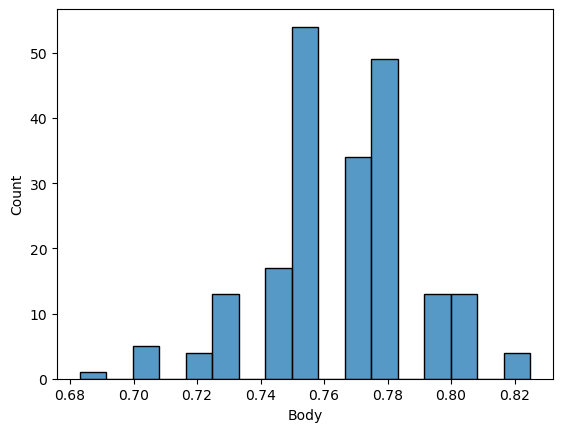

In [59]:
sns.histplot(data=df[scoreCols[4]])

In [60]:
# sns.histplot(data=df['Moisture Percentage'])

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/d

2: 0.40056872818221745
3: 0.33122915335261366
4: 0.29397606280510413
5: 0.26994581248929117
6: 0.21258758803078334
7: 0.19882842384655253
8: 0.19919115719948405
9: 0.18306559528662233
10: 0.17944637394061563
11: 0.1807180521959538
12: 0.1832794767333621
13: 0.18147321539255554
14: 0.16391388277832517
15: 0.15818206367282225
16: 0.17593923497846306
17: 0.17372478764219956
18: 0.15493392572788403
19: 0.18105726035464845
20: 0.15951858625050966
21: 0.160424554635824
22: 0.161888290993725
23: 0.16238873672431553
24: 0.17008526638676613
25: 0.1648891994417548
26: 0.17581168630805133
27: 0.15881466288076973
28: 0.16190314962735478
29: 0.16223811219757714


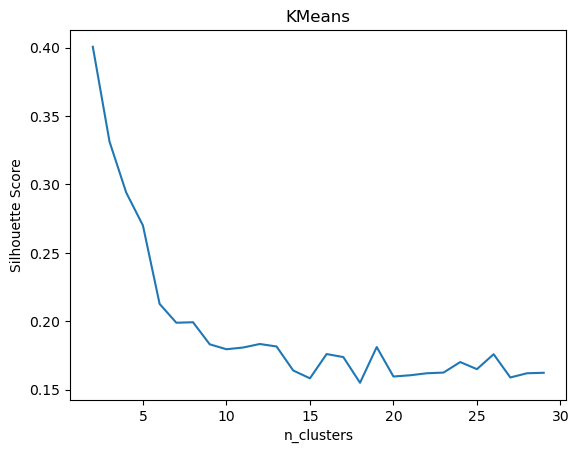

In [62]:
from sklearn.cluster import KMeans
silScores = []
nClusts = []
randScores = []
inertias = []

for i in range(2, 30):
    kmModel = KMeans(n_clusters=i)
    pred = kmModel.fit_predict(X)
    silScores.append(silhouette_score(X, pred))
    randScores.append(rand_score(y, pred))
    nClusts.append(i)
    inertias.append(kmModel.inertia_)

sns.lineplot(x=nClusts, y=silScores).set(title='KMeans', xlabel='n_clusters', ylabel='Silhouette Score')

for i in range(len(nClusts)):
    print(f"{nClusts[i]}: {silScores[i]}")
#elbow method suggests about 6 clusters

2: 0.5146569110266873
3: 0.6240326438722387
4: 0.6605224895642794
5: 0.7091599831152385
6: 0.7520285164860935
7: 0.7664743679939965
8: 0.7646920876131513
9: 0.798133295811641
10: 0.7870174944890015
11: 0.8102809436705596
12: 0.8122977346278317
13: 0.803058017916608
14: 0.8200834857652081
15: 0.8249613057548896
16: 0.8182543032690774
17: 0.825946250175883
18: 0.8339196097744008
19: 0.8253834247924582
20: 0.8386567234182262
21: 0.8395009614933634
22: 0.8440973687913325
23: 0.8477088316683082
24: 0.8456920407110361
25: 0.8443787814830449
26: 0.8473805168613104
27: 0.8532901833872708
28: 0.8535246939636978
29: 0.8538530087706956


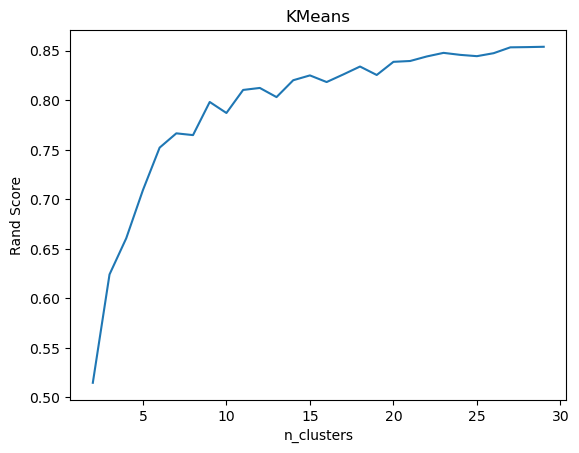

In [63]:
sns.lineplot(x=nClusts, y=randScores).set(title='KMeans', xlabel='n_clusters', ylabel='Rand Score')

for i in range(len(nClusts)):
    print(f"{nClusts[i]}: {randScores[i]}")

2: 0.4358547100563912
3: 0.30607926798169144
4: 0.25065068580306704
5: 0.2108523192346539
6: 0.19472847305898447
7: 0.18258951367258022
8: 0.17207889246031755
9: 0.16274446655561414
10: 0.15461096743350702
11: 0.14683454100840068
12: 0.14038505445927812
13: 0.13628268803714005
14: 0.1308131682599808
15: 0.12557594687969934
16: 0.11841468738576243
17: 0.11240979451659455
18: 0.11206252905906358
19: 0.10433795197718691
20: 0.10479640158114839
21: 0.0978141042600374
22: 0.09659240460505686
23: 0.09217046829559333
24: 0.09019092595864753
25: 0.09028347062520817
26: 0.08408276338522594
27: 0.08306451044511048
28: 0.08125710859695864
29: 0.07889738273670778


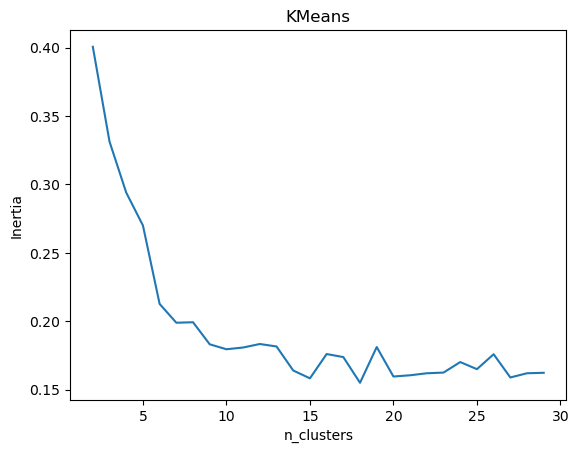

In [64]:
sns.lineplot(x=nClusts, y=silScores).set(title='KMeans', xlabel='n_clusters', ylabel='Inertia')

for i in range(len(nClusts)):
    print(f"{nClusts[i]}: {inertias[i]}")

In [65]:
from sklearn.cluster import KMeans

kmModel = KMeans(n_clusters=5)

kmModel.fit(X)

print(kmModel.inertia_)

0.2109330087757989


/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2: 0.3695142257966733
3: 0.3416280578158344
4: 0.23910142524006758
5: 0.22208755886936998
6: 0.22617876832234304
7: 0.181427068849895
8: 0.1840746714582925
9: 0.1822623214565856
10: 0.18222756460151973
11: 0.14338861552659535
12: 0.135179941038768
13: 0.14218139281774747
14: 0.1388000073103965
15: 0.14191549799715278
16: 0.15011879629518593
17: 0.15372705871504286
18: 0.15225330196902967
19: 0.15289265538002292
20: 0.1552311030777236
21: 0.1545601097697979
22: 0.15431056688576753
23: 0.16061523354144963
24: 0.1596763628940955
25: 0.16449762913630953
26: 0.1628613771881358
27: 0.16085364651923842
28: 0.16501719261606887
29: 0.1670230041825791


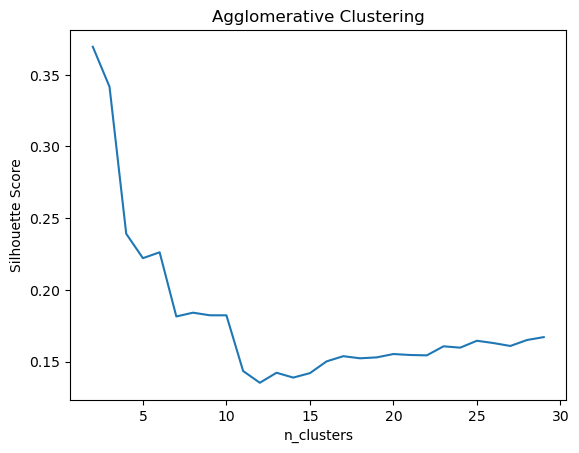

In [66]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

nClusts = []
silScores = []
randScores = []

for i in range(2, 30):
    agg = AgglomerativeClustering(n_clusters=i, metric='euclidean')
    agg.fit(X)
    nClusts.append(i)
    silScores.append(silhouette_score(X, agg.labels_))
    randScores.append(rand_score(y, agg.labels_))


sns.lineplot(x=nClusts, y=silScores).set(title='Agglomerative Clustering', xlabel='n_clusters', ylabel='Silhouette Score')

for i in range(len(nClusts)):
    print(f"{nClusts[i]}: {silScores[i]}")

#11 is smallest number of clusters

2: 0.4519956850053937
3: 0.5325266169504245
4: 0.6828947985554148
5: 0.7091599831152385
6: 0.7129121523380705
7: 0.7558744899394962
8: 0.7566249237840627
9: 0.7635195347310164
10: 0.766286759532855
11: 0.7947094413958069
12: 0.8046526898363117
13: 0.8139393086628207
14: 0.819614464612354
15: 0.8198020730734956
16: 0.822897612682332
17: 0.8230852211434736
18: 0.8245860888326063
19: 0.8246329909478918
20: 0.8337320013132592
21: 0.8367337366915248
22: 0.8378593874583744
23: 0.839219548801651
24: 0.8434407391773369
25: 0.8434876412926223
26: 0.8448009005206135
27: 0.8460203555180339
28: 0.8517424135828526
29: 0.8550255616528305


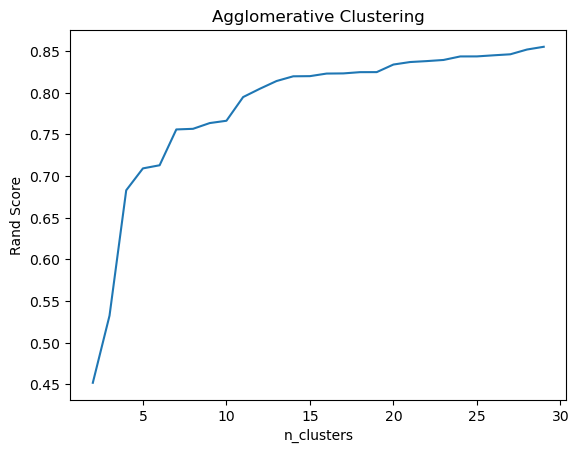

In [67]:
sns.lineplot(x=nClusts, y=randScores).set(title='Agglomerative Clustering', xlabel='n_clusters', ylabel='Rand Score')

for i in range(len(nClusts)):
    print(f"{nClusts[i]}: {randScores[i]}")

2: 0.134382474568769
3: 0.04388395247480523
4: 0.08894826035598367
5: 0.10911459420458913
6: 0.14022971298389084
7: 0.11969717899823634
8: 0.14767305961731528
9: 0.0629981370259529
10: 0.13036539955767307
11: 0.14011041005253036
12: 0.1692639730626881
13: 0.14306282260225683
14: 0.09618382263247893
15: 0.14159369947595196
16: 0.1411232079068057
17: 0.12261546077965821
18: 0.1685140222845258
19: 0.11275294095083019
20: 0.1443294771792575
21: 0.13372208557570184
22: 0.1461422679981772
23: 0.12908664190958438
24: 0.14269123312687884
25: 0.15342834725989343
26: 0.1352600096190766
27: 0.15375659575169479
28: 0.15438679409336478
29: 0.11636755759238727


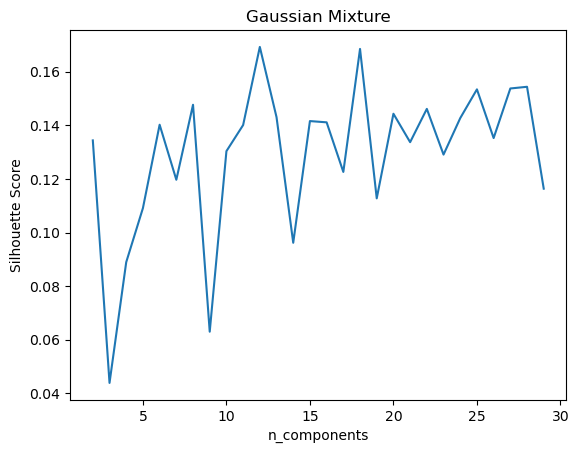

In [68]:
from sklearn.mixture import GaussianMixture

nComps = []
silScores = []
randScores = []
for i in range(2, 30):
    gmm = GaussianMixture(n_components=i)
    pred = gmm.fit_predict(X)
    silScores.append(silhouette_score(X, pred))
    nComps.append(i)
    randScores.append(rand_score(y, pred))

sns.lineplot(x=nComps, y=silScores).set(title='Gaussian Mixture', xlabel='n_components', ylabel='Silhouette Score')

for i in range(len(nComps)):
    print(f"{nComps[i]}: {silScores[i]}")

2: 0.4032174851085784
3: 0.5440176351953473
4: 0.6347732282725951
5: 0.7210262182824445
6: 0.7100042211903757
7: 0.7092068852305239
8: 0.7476666197645514
9: 0.7946156371652362
10: 0.7852821162234417
11: 0.776511420665072
12: 0.7927395525538202
13: 0.8188640307677876
14: 0.8156746869283805
15: 0.8034332348388913
16: 0.8237418507574692
17: 0.8218188640307678
18: 0.8164720228882323
19: 0.8310116786267061
20: 0.8327470568922658
21: 0.8381408001500867
22: 0.8329346653534074
23: 0.8398761784156465
24: 0.8430186201397682
25: 0.8489282866657286
26: 0.8451761174428967
27: 0.8507105670465738
28: 0.847099104169598
29: 0.8514610008911402


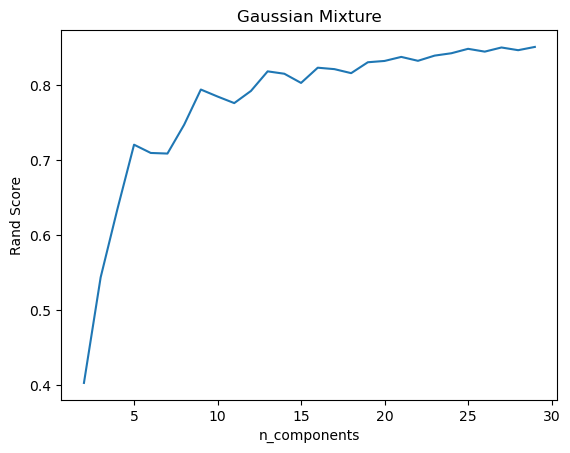

In [69]:
sns.lineplot(x=nComps, y=randScores).set(title='Gaussian Mixture', xlabel='n_components', ylabel='Rand Score')

for i in range(len(nComps)):
    print(f"{nComps[i]}: {randScores[i]}")